## 3. Natural Language Processing
### 1. Preprocessing the documents for analysis
#### 1. Tokenize
* First we split the lyrics in two datasets, one for training and one for testing.
* For now we will work with the training set. We use gensims simple_preprocess function, to convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [1]:
import gensim
from sklearn.model_selection import train_test_split
import pandas as pd 
from gensim.utils import simple_preprocess

df = pd.read_csv('../dataset/artists_one_hot_encoded_pca.csv', index_col=['Band'])
train, test = train_test_split(df, test_size=0.2)
train.to_csv('../dataset/Lyrics_en_artists_clean_train.csv')
test.to_csv('../dataset/Lyrics_en_artists_clean_test.csv')
del test
del train

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('../dataset/Lyrics_en_artists_clean_train.csv')
for index, row in df.iterrows():
    lyric = row[1]
    newLyric = gensim.utils.simple_preprocess(str(lyric), deacc=True)
    df.at[index, 'Lyrics'] = newLyric
df  

,Band,Lyrics,acid,acoustic,adult,age,album,alternative,americana,and,...,0,1,2,3,4,5,6,7,8,9
0,Leo Sayer,"[farewell, old, friend, leave, me, now, be, go...",0,0,1,0,0,0,0,0,...,-0.137803,1.807695,0.261667,0.321838,0.058538,-0.939253,-0.300022,0.014185,0.000127,-0.435531
1,Rick Springfield,"[now, can, tell, you, how, feel, broken, heart...",0,0,0,0,1,0,0,0,...,-0.995474,1.659972,0.087044,0.009426,0.593562,-0.604191,-0.211119,-0.275529,-0.885951,0.145885
2,Katie Melua,"[you, re, like, secret, symphony, that, was, c...",0,0,0,0,0,0,0,0,...,0.611690,-0.307951,-0.091200,-0.353698,0.087799,0.157082,-0.080834,-0.420153,0.030168,0.150349
3,Ike Quebec,"[could, show, the, world, how, to, smile, coul...",0,0,0,0,0,0,0,0,...,0.643051,-0.590612,-0.206580,-0.768192,1.540291,0.152065,0.522778,-0.455186,0.208514,-1.005969
4,Tori Amos,"[load, up, on, guns, bring, your, friends, it,...",0,0,0,0,0,0,0,0,...,-1.008280,1.238291,-0.057360,0.317390,0.365412,0.628785,-0.261243,-0.630747,0.113289,0.342137
5,Marvin Gaye,"[baby, please, stay, don, go, away, baby, don,...",0,0,0,0,0,0,0,0,...,0.055658,-0.387400,-0.181425,-0.355558,0.970810,-0.598812,-0.392279,1.139917,0.380985,0.640052
6,Sly & Robbie,"[that, may, be, all, need, in, darkness, she, ...",0,0,0,0,0,0,0,0,...,-0.070802,-0.372412,0.041041,-0.238111,-0.152987,-0.107222,-0.386034,-0.190035,0.073516,0.155998
7,Keb' Mo',"[ain, got, no, money, nowhere, to, sleep, no, ...",0,0,0,0,0,0,0,0,...,-0.146235,-0.474542,0.769208,0.103429,0.018419,-0.019159,-0.075911,-0.063504,0.525616,0.293656
8,The Searchers,"[sugar, and, spice, and, all, things, nice, ki...",0,0,1,0,0,0,0,0,...,0.455524,1.593258,0.104360,0.648141,-0.517314,-0.458454,-0.292488,0.477262,0.539191,-1.005526
9,Kirk Franklin,"[imagine, me, loving, what, see, when, the, mi...",0,0,0,0,0,0,0,0,...,-0.021715,-0.510600,0.187986,-0.034620,-0.158903,-0.008318,-0.303529,-0.047458,-0.098837,0.046567


#### 2. Create bigrams and trigrams models
Use gensim Phraser to detect phrases, a phrase is a token formed by two (bigram) or more words. 

For example New and York may appear together very often, this process will detect them and join them as a single token New_York.

In [3]:
from gensim.models.phrases import Phrases, Phraser

lyrics = list()
for i in range(0, df.shape[0]):
    lyric = df.iloc[i][1]
    lyrics.append(lyric)
    
bi_prhases = Phrases(lyrics, min_count=5, threshold=40)
tri_prhases = Phrases(bi_prhases[lyrics], threshold=40)  

bigram = Phraser(bi_prhases)
trigram = Phraser(tri_prhases)


C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


#### 3. Remove stop words
There are words that have no meaning to our dataset. We use nltk stop words, add a couple of words (s and chorus) and then remove them from our dataset. 

In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['s', 'chorus'])

new_lyrics = list()
for lyric in lyrics:
    new_lyric = list()
    for word in lyric:
        if(word not in stop_words):
            new_lyric.append(word)
    new_lyrics.append(new_lyric)
    
#print(lyrics[0])
#print(new_lyrics[0])
lyrics = new_lyrics
del new_lyrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jescobedo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 4. Lemmatize words
The are words that have no meaning, removed in previous step, but there are words with the same meaning as others (e.g. am, are, is = be). This time we use spacy to transform these words, only keeping nouns, adjetives, verbs and adverbs. 

In [5]:
bigram_lyrics = list()
for lyric in lyrics:
    bigram_lyrics.append(bigram[lyric])
lyrics = bigram_lyrics
del bigram_lyrics

In [6]:
import spacy
import en_core_web_sm

# python -m spacy download en
nlp = en_core_web_sm.load(disable=['parser', 'ner'])

allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
lemma_lyrics = list()
for lyric in lyrics:
    doc = nlp(" ".join(lyric)) 
    lemma_lyric = list()
    for token in doc:
        if(token.pos_ in allowed_postags):
            lemma_lyric.append(token.lemma_)
    lemma_lyrics.append(lemma_lyric)


print(lemma_lyrics[:1])
lyrics = lemma_lyrics

del lemma_lyrics

[['old', 'friend', 'leave', 'go', 'soul', 'weak', 'mind', 'never', 'strong', 'watch', 'hand', 'night', 'see', 'way', 'shake', 'see', 'endless', 'road', 'see', 'way', 'take', 'still', 'old', 'night', 'still', 'seem', 'right', 'darkness', 'blind', 'eye', 'write', 'life', 'endless', 'scrap', 'paper', 'year', 'hang', 'round', 'life', 'waste', 'labor', 'still', 'old', 'night', 'somehow', 'feel', 'right', 'darkness', 'blind', 'eye', 'goodnight', 'old', 'friend', 'see', 'dawn', 'come', 'haunt', 'watch', 'life', 'unfold', 'see', 'shape', 'take', 'watch', 'finger', 'write', 'see', 'way', 'shake', 'still', 'old', 'night', 'somehow', 'feel', 'right', 'darkness', 'blind', 'eye', 'goodnight', 'old', 'friend', 'see', 'dawn', 'come', 'haunt', 'still', 'old', 'night', 'still', 'old', 'night', 'still', 'old', 'night', 'still', 'old', 'night']]


In [7]:
import pickle

#SAVE LYRICS to disk
with open('../dataset/lemma_lyrics_train', 'wb') as fp:
    pickle.dump(lyrics, fp)

Most common words

In [9]:
from collections import Counter

words = list()
for lyric in lyrics:
    for word in lyric:
        words.append(word)

word_freq = Counter(words)

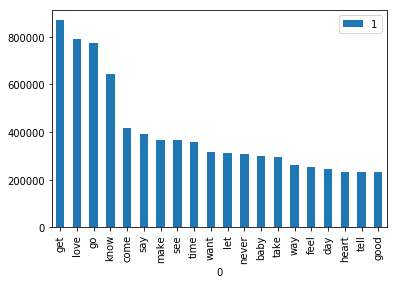

In [10]:
import pandas as pd
%matplotlib inline

df = pd.DataFrame.from_dict(word_freq.most_common(20))
df.plot(x=0, kind ='bar')

### 2. Word representation
#### 1. BOW and Tf-idf

* Using gensim's corpora we create a dictionary. A dictionary is the mapping of each word to an id.
* With this dictionary we create a bag of words **(BOW)** for each document, which is a list of tuples, with information of each token id (from the dictionary) and the number of times it appears in each document.
* Finally with the **BOWs** we create a term frequency - inverse document frequency model **(Tf-Idf)**, this model transforms each word frequency to its importance score in every document. The bigger the number, the more common.

In [11]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

id2word = corpora.Dictionary(lyrics)
id2word.save("../dataset/lemma_lyrics_train_dict")

bow_corpus = list()

for lyric in lyrics:
    bow_corpus.append(id2word.doc2bow(lyric))

tfidf = TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]
print(bow_corpus[0])
print(tfidf_corpus[0])

[(0, 3), (1, 2), (2, 3), (3, 2), (4, 2), (5, 3), (6, 2), (7, 1), (8, 3), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 8), (20, 10), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 7), (27, 1), (28, 2), (29, 1), (30, 2), (31, 1), (32, 8), (33, 1), (34, 2), (35, 1), (36, 1), (37, 3), (38, 3), (39, 1), (40, 2), (41, 1)]
[(0, 0.2247213588947653), (1, 0.043333364577269155), (2, 0.2554602039656955), (3, 0.1689050047840999), (4, 0.20947507671531032), (5, 0.10774938498357743), (6, 0.05976125414706273), (7, 0.08449242907772092), (8, 0.15192225887098762), (9, 0.014085091685518717), (10, 0.23417023609640664), (11, 0.042799385720336265), (12, 0.07136911071413188), (13, 0.20104131627203195), (14, 0.14806699152104735), (15, 0.03601579579503206), (16, 0.0986263466989258), (17, 0.04195423803492642), (18, 0.026211041304866015), (19, 0.26697151410353576), (20, 0.46434140839831706), (21, 0.09108215745645894), (22, 0.11046156226784594), (23, 0.06862583313

#### 2. Word2Vec
* Word2Vec transforms a collection of documents and produces a vector space of each word.
* These vector are close to the vectors that are common to them.
* Word2Vec is a neural network of two dimmensions
* Here we use the continuos bag of word (CBOW) algorithm, that tries to predict a word based on its context. This is useful since skip-gram instead tries to predict the context, making it slower but more accurate on infrequent words. In our case, musicians have a small vocabulary, so it is not need.

In [12]:
from gensim.models.word2vec import Word2Vec

word2vec = Word2Vec(lyrics, workers=4, iter=3)
word_vectors = word2vec.wv
word2vec.save("../dataset/word2vec")

Now lets see the most similar words

In [13]:
word_vectors.similar_by_word("love")

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('loving', 0.7794288396835327),
 ('know', 0.7154898047447205),
 ('baby', 0.7057422399520874),
 ('true', 0.6951654553413391),
 ('heart', 0.6520286798477173),
 ('darling', 0.646308422088623),
 ('want', 0.63880455493927),
 ('give', 0.6386334300041199),
 ('forever', 0.6372485756874084),
 ('ever', 0.6367300748825073)]

In [14]:
word_vectors.similar_by_word("rain")

[('sunshine', 0.6195969581604004),
 ('sheepdog_stand', 0.616571307182312),
 ('rainmaker', 0.5697716474533081),
 ('enliven', 0.5553178787231445),
 ('pour', 0.5507749319076538),
 ('raindrop', 0.5477860569953918),
 ('pain', 0.5407994985580444),
 ('hurricane', 0.5303230285644531),
 ('storm', 0.5241384506225586),
 ('sun', 0.5189480185508728)]

In [15]:
word_vectors.similar_by_word("god")

[('blessed', 0.652320384979248),
 ('bless', 0.6270580291748047),
 ('lord', 0.6269985437393188),
 ('almighty', 0.6248934864997864),
 ('mercy', 0.5936386585235596),
 ('satan', 0.5908628702163696),
 ('savior', 0.5875152349472046),
 ('redeemer', 0.5701988339424133),
 ('saviour', 0.5698780417442322),
 ('righteous', 0.568621039390564)]

In [16]:
word_vectors.similar_by_word("bitch")

[('hoe', 0.8186517953872681),
 ('nigga', 0.7922878265380859),
 ('shit', 0.7752084136009216),
 ('fuckin', 0.7602618932723999),
 ('motherfucker', 0.7488785982131958),
 ('fuck', 0.7478044033050537),
 ('ass', 0.7465381622314453),
 ('niggas', 0.7457152605056763),
 ('pussy', 0.7229638695716858),
 ('hos', 0.7141510248184204)]

#### 3. Doc2Vec
* This model adds an extra description to the Word2Vec model, this model also adds a representation related to the document, not only the words.

In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_lyrics = [TaggedDocument(lyric, [i]) for i, lyric in enumerate(lyrics)]

doc2vec = Doc2Vec(tagged_lyrics, workers=4, epochs=3)
doc_vectors = doc2vec.docvecs

doc2vec.save("../dataset/doc2vec")

Lets see the most similar documents to the given document

In [18]:
new_vector = doc2vec.infer_vector(['loving', 'baby', 'darling', 'love', 'heart', 'give', 'heart'])
sims = doc_vectors.most_similar([new_vector], topn=5)
for sim in sims:
    print(lyrics[sim[0]], sim[1], sim[0])

['embrace', 'sweet_embraceable', 'embrace', 'irreplaceable', 'look', 'heart', 'grew_tipsy', 'alone', 'bring', 'gypsy', 'love', 'many', 'charm', 'want', 'arm', 'naughty', 'baby', 'come', 'papa', 'come', 'papa', 'sweet_embraceable'] 0.8031504154205322 356947
['special', 'place', 'heart', 'baby', 'always', 'special', 'place', 'heart', 'baby', 'always', 'special', 'place', 'heart', 'baby', 'always', 'special', 'place', 'heart', 'heart', 'special', 'place'] 0.8023737668991089 416140
['hurt', 'soul', 'hurt', 'soul', 'go', 'go', 'go', 'baby', 'babe', 'baby', 'really', 'love', 'baby', 'read', 'letter', 'send', 'make', 'mad', 'mad', 'mad', 'read', 'news', 'bring', 'make', 'sad', 'sad', 'sad', 'still', 'love', 'let', 'go', 'love', 'baby', 'love', 'read', 'letter', 'write', 'make', 'mad', 'mad', 'mad', 'read', 'news', 'tell', 'make', 'sad', 'sad', 'sad', 'still', 'love', 'let', 'go', 'love', 'baby', 'love', 'tear', 'cry', 'tear', 'cry', 'baby', 'go', 'go', 'go', 'go', 'breath', 'take', 'move', 'm

In [19]:
new_vector = doc2vec.infer_vector("rain sunshine storm raindrop".split())
sims = doc_vectors.most_similar([new_vector], topn=5)
for sim in sims:
    print(lyrics[sim[0]], sim[1])

['behold', 'lamb', 'behold', 'lamb', 'slay', 'foundation', 'world', 'sinner', 'crucify', 'holy', 'sacrifice', 'behold', 'lamb', 'god', 'behold', 'lamb', 'crown', 'crown', 'worthy', 'lamb', 'praise', 'praise', 'earth', 'resound'] 0.9001709222793579
['chestnuts_roast', 'open', 'fire', 'jack_frost', 'nipping', 'nose_yule', 'tide_carol', 'sing', 'choir', 'folk', 'dress', 'eskimos_everybody', 'knows_turkey', 'mistletoe', 'help', 'make', 'season', 'bright', 'tiny_tot', 'eye', 'aglow', 'find', 'hard', 'sleep', 'tonight', 'know', 'santa', 'way', 'loaded_lot', 'toy', 'goody', 'sleigh', 'mother', 'child', 'go', 'spy', 'see', 'reindeer', 'really', 'know', 'fly', 'offer', 'simple_phrase', 'kid', 'say', 'many', 'time', 'many', 'way', 'merry_christma'] 0.8772134780883789
['night', 'star', 'shine', 'bright', 'myst_ry', 'fading', 'light', 'shin', 'caravan', 'sleep', 'shoulder', 'creep', 'sand', 'may', 'keep', 'mem_ry', 'caravan', 'excite', 'inviting_resting', 'arm', 'thrill', 'magic', 'charm', 'blue',

In [20]:
new_vector = doc2vec.infer_vector("god".split())
sims = doc_vectors.most_similar([new_vector], topn=5)
for sim in sims:
    print(lyrics[sim[0]], sim[1])

['chestnuts_roast', 'open', 'fire', 'jack_frost', 'nipping', 'nose_yule', 'tide_carol', 'sing', 'choir', 'folk', 'dress', 'eskimos_everybody', 'knows_turkey', 'mistletoe', 'help', 'make', 'season', 'bright', 'tiny_tot', 'eye', 'aglow', 'find', 'hard', 'sleep', 'tonight', 'know', 'santa', 'way', 'loaded_lot', 'toy', 'goody', 'sleigh', 'mother', 'child', 'go', 'spy', 'see', 'reindeer', 'really', 'know', 'fly', 'offer', 'simple_phrase', 'kid', 'say', 'many', 'time', 'many', 'way', 'merry_christma'] 0.8650982975959778
['dance', 'music', 'dance', 'music', 'dance', 'music', 'dance', 'music', 'keep', 'dancin', 'music', 'keep', 'dancin', 'music', 'jones', 'alone', 'stoner', 'bag', 'get', 'girl', 'get', 'girl', 'easy', 'keep', 'dancin', 'music', 'keep', 'dancin', 'music', 'keep', 'dancin', 'thing', 'keep', 'dancin', 'hear', 'sing', 'dance', 'music', 'dance', 'music', 'dance', 'music', 'dance', 'music', 'take', 'floor', 'lookin', 'good', 'get', 'snow', 'could', 'girl', 'know', 'number', 'girl', 

In [21]:
new_vector = doc2vec.infer_vector("dog".split())
sims = doc_vectors.most_similar([new_vector], topn=5)
for sim in sims:
    print(lyrics[sim[0]], sim[1])

['behold', 'lamb', 'behold', 'lamb', 'slay', 'foundation', 'world', 'sinner', 'crucify', 'holy', 'sacrifice', 'behold', 'lamb', 'god', 'behold', 'lamb', 'crown', 'crown', 'worthy', 'lamb', 'praise', 'praise', 'earth', 'resound'] 0.8693224787712097
['night', 'star', 'shine', 'bright', 'myst_ry', 'fading', 'light', 'shin', 'caravan', 'sleep', 'shoulder', 'creep', 'sand', 'may', 'keep', 'mem_ry', 'caravan', 'excite', 'inviting_resting', 'arm', 'thrill', 'magic', 'charm', 'blue', 'dream', 'love', 'come', 'true', 'desert_caravan'] 0.8601648211479187
['come', 'tell', 'pa_rum', 'pum_pum', 'pum', 'newborn_k', 'see', 'pa_rum', 'pum_pum', 'pum', 'finest_gift', 'bring', 'pa_rum', 'pum_pum', 'pum', 'lie', 'king', 'pa_rum', 'pum_pum', 'pum_rum', 'pum_pum', 'pum_rum', 'pum_pum', 'pum', 'honor', 'pa_rum', 'pum_pum', 'pum', 'come', 'little', 'baby', 'pa_rum', 'pum_pum', 'pum', 'poor', 'boy', 'pa_rum', 'pum_pum', 'pum', 'gift', 'bring', 'pa_rum', 'pum_pum', 'pum', 'fit', 'give', 'king', 'pa_rum', 'pum_